In [1]:
# Import libraries
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


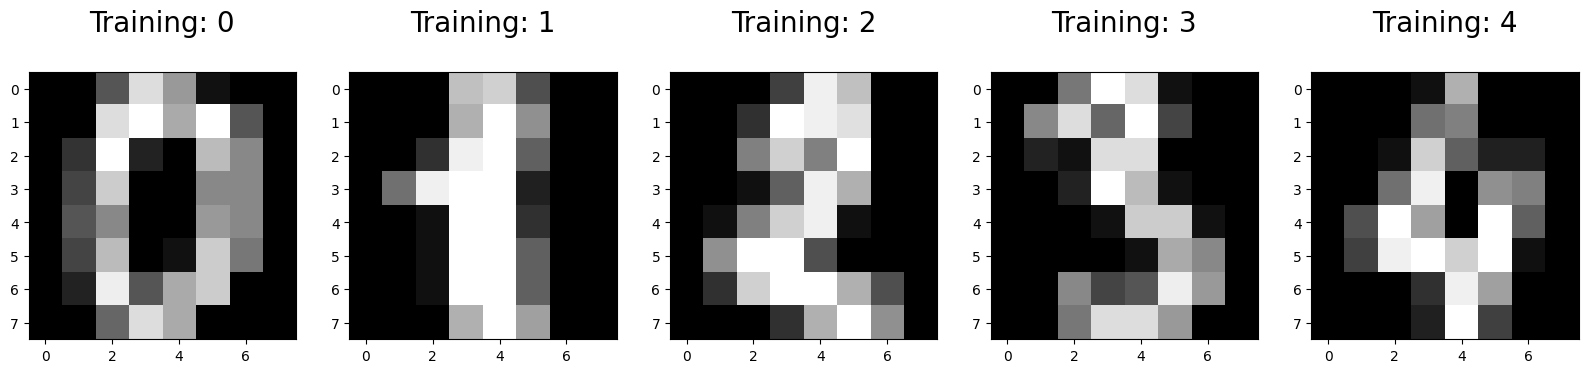

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
# Set up input matrix and target vector
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


The purpose of dividing data into training and test sets is to evaluate the performance and generalisation ability of a machine learning model. The training set is used to train the model, by learning patterns and relationships within the data. The test set is used to assess the model's performance on new, unseen data. This separation ensures that the model does not simply memorise the training data (overfitting), but can also make accurate predictions on real-world data, providing a realistic measure of its effectiveness and reliability.

In [5]:
# The shape of the testing/training inputs and ouputs
print("Training inputs shape:", X_train.shape)
print("Training outputs shape:", y_train.shape)
print("Testing inputs shape:", X_test.shape)
print("Testing outputs shape:", y_test.shape)

Training inputs shape: (1437, 64)
Training outputs shape: (1437,)
Testing inputs shape: (360, 64)
Testing outputs shape: (360,)


In [6]:
# Create the model
clf = RandomForestClassifier(random_state = 42)

The parameter chosen is 'min_samples_split'. The 'min_samples_split' parameter in the RandomForestClassifier controls the minimum number of samples required to split an internal node. 

Overfitting happens when a model learns the details and noise in the training data, making it perform poorly on new, unseen data. If trees grow too deep, they can create very specific rules that fit the training data too closely. By setting a higher value for 'min_samples_split', we ensure that a node must have a sufficient number of samples before it can be split into more nodes. This prevents the trees from becoming too complex and deep, reducing the chance of overfitting.
Requiring a minimum number of samples to split nodes leads to a more general and reliable model.

In [7]:
# Set up parameter grid
param_grid = {
    'min_samples_split': [2, 5, 15, 20, 25, 30, 35, 40, 45, 50]
}

# Create the grid search object
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_split': [2, 5, 15, 20, 25, 30, 35, 40, 45,
                                               50]})

In [8]:
# Determine the value of the parameter that resulted in the best model performance
best_params = grid_search.best_params_
best_params

{'min_samples_split': 5}

Setting 'min_samples_split' to 5 in the final model ensures that the decision tree or random forest splits nodes only when there are at least 5 samples available. This choice helps in preventing overfitting by ensuring the model does not learn noise or outliers specific to the training data that may not generalise well. By requiring a minimum number of samples per split, the model becomes more robust against small variations in the data and focuses on making splits that significantly improve the purity of nodes. This parameter value ultimately returns the best performance on the test data.

In [9]:
# Initialise and train the RandomForestClassifier with the optimal min_samples_split parameter
clf = RandomForestClassifier(min_samples_split=best_params['min_samples_split'], random_state=42)
clf.fit(X_train, y_train) 

RandomForestClassifier(min_samples_split=5, random_state=42)

In [10]:
# Model predictions for performance evaluation
y_pred = clf.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]], dtype=int64)

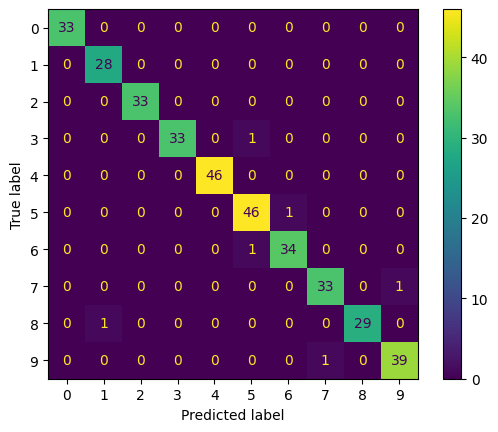

In [12]:
# Class labels for the dataset
class_labels = digits.target_names

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
display.plot()
plt.show()

In [13]:
# Calculating the accuracy, percision, recall and f1-score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")
f1 = f1_score(y_test, y_pred, average = "macro")

print(f"Test set accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Test set accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


The model performed very well on the test set, with accuracy, precision, recall, and F1-scores at 0.98. These results show that the model's predictions were accurate and consistent across various evaluation metrics, demonstrating its robustness and reliability in classifying data. The model's high scores across multiple metrics indicate that it effectively balanced identifying positive instances (precision) and capturing all positive instances (recall), while maintaining overall accuracy. These findings demonstrate the model's ability to generalise and make reliable predictions on previously unseen data, indicating its suitability for practical applications.